In [1]:
import eDiskplot as eplot
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.visualization import AsinhStretch
from eDisk_source_dict import source_dict
import scipy.constants as sc
%matplotlib widget
%load_ext autoreload
%autoreload 2

plt.rcParams.update({
    "xtick.top": True,
    "ytick.right": True})

source = "L1489IRS"
molecular_lines = ["12CO", "13CO", "C18O", "SO"]
imagepath = "/raid/work/yamato/eDisk_data/L1489IRS/ALMA_pipeline_reduced_data/try1_continuum_nterms1/"
productpath = "/raid/work/yamato/eDisk_data/L1489IRS/data_product_test/"
wedge = 90
rmax = 8
rmax_zoomed = 2.5
beam_kw = dict(fill=True)

rm: '/home/yamato/Project/qDisk/casa-*.log' を削除できません: そのようなファイルやディレクトリはありません


# Fiducial continuum map
- imaging params: robust=1.0, no uvtaper
- dust disk extent ~ 3 arcsec in radius
- possible ring structure (or emission enhance) at ~0.5 arcsec

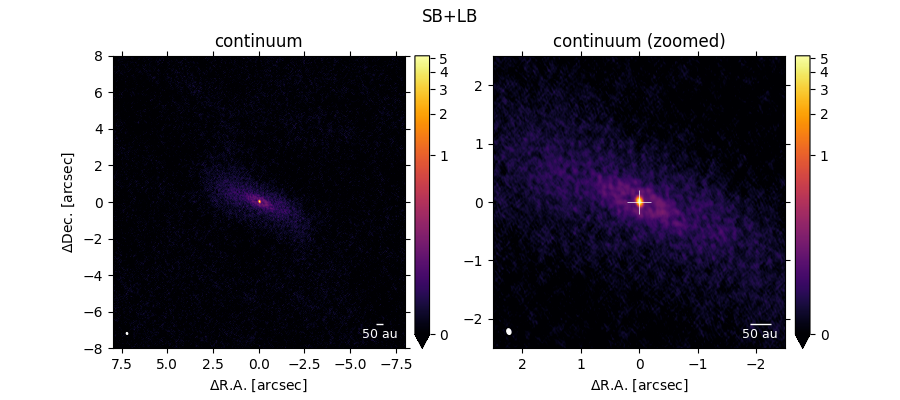

In [2]:
# continuum
################################# SB+LB ####################################################
baseline = "SBLB"
fig, axes = plt.subplots(1, 2, figsize=(9,4))

imagename = imagepath + "{:s}_{:s}_continuum_robust_1.0.image.tt0.fits".format(
    source, baseline
)

# wide
ax = axes[0]
eplot.plot_map(
    fitsname=imagename,
    ax=ax,
    center_coord=SkyCoord(source_dict[source]["radec"]),
    data_scaling_factor=1e3,
    cmap="inferno",
    norm_kwargs=dict(stretch=AsinhStretch(a=0.02), vmin=0.0),
    beam_kw=beam_kw
)
r = rmax
ax.set(
    xlim=(r, -r),
    ylim=(-r, r),
    xlabel="$\Delta$R.A. [arcsec]",
    ylabel="$\Delta$Dec. [arcsec]",
    title="continuum"
)

# zoomed
ax = axes[1]
eplot.plot_map(
    fitsname=imagename,
    ax=ax,
    center_coord=SkyCoord(source_dict[source]["radec"]),
    data_scaling_factor=1e3,
    cmap="inferno",
    norm_kwargs=dict(stretch=AsinhStretch(a=0.02), vmin=0.0),
    beam_kw=beam_kw
)
r = rmax_zoomed
ax.set(
    xlim=(r, -r),
    ylim=(-r, r),
    xlabel="$\Delta$R.A. [arcsec]",
    title="continuum (zoomed)"
)
# check the peak position
ax.scatter(0.0, 0.0, marker="+", color="white", linewidths=0.5, s=300)

fig.suptitle("SB+LB");

## Characterization of dust disk structure by image domain fit
- two 2D Gaussian (central small and outer broad component) are fitted to the data 
- significant residual appeared due to the dust ring

### Estimated disk geometry
1. central small disk
- disk size: 0.10 arcsec x 0.069 arcsec
- peak position: (61.17949985, 26.31558848) in deg
- inclination: 46.4 deg

1. broad disk
- disk size: 4.1 arcsec x 1.4 arcsec
- peak position: (61.17951863, 26.31558898) in deg
- inclination: 70.7 deg



![imfit](./imfit_L1489IRS_SBLB_continuum_robust_1.0/L1489IRS_SBLB_continuum_robust_1.0.imfit.fit.png)


## Characterization of dust emission structure by visibility fit with GALARIO
### TBD

## velocity-integrated intensity (moment 0) maps of 12CO, 13CO, C18O, SO
### SB+LB
- these lines will be relevant for first-look paper
- 12CO traces the central dense component and outflow cavities
- 13CO and C18O mainly traces the disk component, up to ~5 arcsec?
- 13CO and C18O possibly show a inner small cavity? possibly caused by cabsorption against optically thick continuum
- SO shows a centrally peaked morphology; no absorption? need careful comparisons with continuum
- maps are a bit noisy except 12CO; may consider some masking? (clean mask, Keplerian mask, sigma-clipping, etc.)

### SB-only
- basically the same morphologies as SB+LB
- still a bit noisy (in particular SO), may consider masking

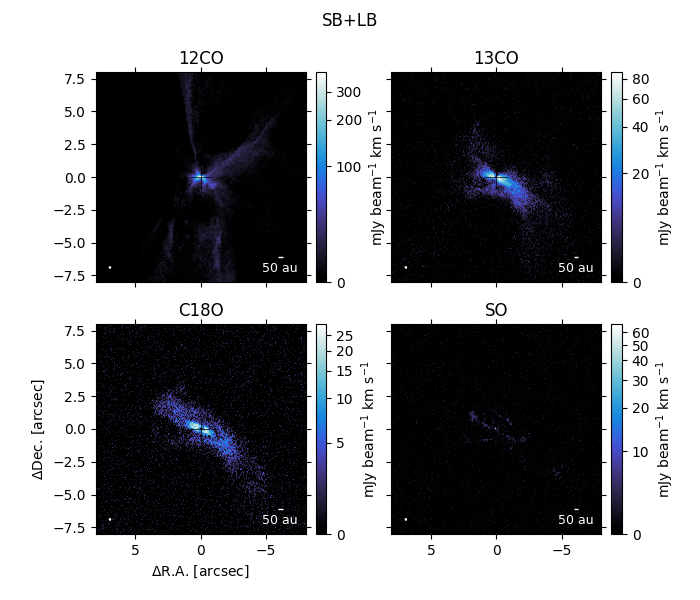

In [7]:
# lines
########################## SB+LB #################################
baseline = "SBLB"

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)

for i, line in enumerate(molecular_lines):
    ax = axes.flatten()[i]
    imagename = productpath + "{:s}_{:s}_{:s}_robust_0.5.image_M0.fits".format(
        source, baseline, line, wedge
    )

    imagename = imagepath + "{:s}_{:s}_{:s}_robust_0.5.image_M0.fits".format(
        source, baseline, line, wedge
    )

    if line == "12CO":
        imagename = imagename.replace(".image_M0.fits", ".image.sub_M0.fits")

    eplot.plot_map(
        fitsname=imagename,
        ax=ax,
        center_coord=SkyCoord(source_dict[source]["radec"]),
        cmap=eplot.cpal,
        norm_kwargs=dict(stretch=AsinhStretch(a=0.1), vmin=0.0),
        beam_kw=beam_kw,
        cbar_kw=dict(label=r"mJy beam$^{-1}$ km s$^{-1}$")
    )
    ax.set(xlim=(rmax, -rmax), ylim=(-rmax, rmax), title=line)
    ax.scatter(0.0, 0.0, marker="+", color="black", linewidths=0.5, s=300)

axes[1,0].set(xlabel="$\Delta$R.A. [arcsec]", ylabel="$\Delta$Dec. [arcsec]",)
plt.suptitle("SB+LB")
plt.subplots_adjust(wspace=0.2, hspace=0.2)


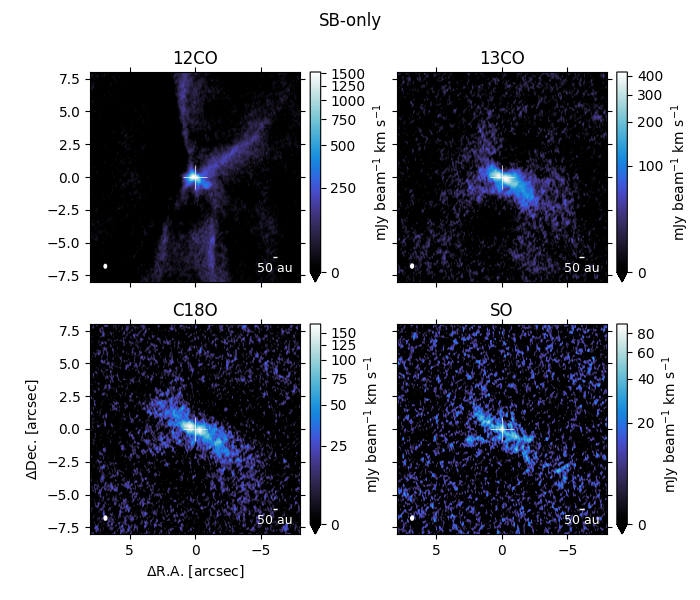

In [25]:

########################### SB only #####################################
baseline = "SB"

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)

ax = axes.flatten()[0]
imagename = imagepath + "{:s}_{:s}_continuum_robust_1.0.image.tt0.fits".format(
    source, baseline
)

for i, line in enumerate(molecular_lines):
    ax = axes.flatten()[i]
    imagename = productpath + "{:s}_{:s}_{:s}_robust_0.5.image_M0.fits".format(
        source, baseline, line, wedge
    )

    eplot.plot_map(
        fitsname=imagename,
        ax=ax,
        center_coord=SkyCoord(source_dict[source]["radec"]),
        cmap=eplot.cpal,
        norm_kwargs=dict(stretch=AsinhStretch(a=0.1), vmin=0.0),
        beam_kw=beam_kw,
        cbar_kw=dict(label=r"mJy beam$^{-1}$ km s$^{-1}$")
    )
    ax.set(xlim=(rmax, -rmax), ylim=(-rmax, rmax), title=line)
    ax.scatter(0.0, 0.0, marker="+", color="white", linewidths=0.5, s=300)

axes[1,0].set(xlabel="$\Delta$R.A. [arcsec]", ylabel="$\Delta$Dec. [arcsec]",)
plt.suptitle("SB-only")
plt.subplots_adjust(wspace=0.3, hspace=0.2)

## Radial emission profiles of continuum and 13CO, C18O and SO
### Radial profile generation
1. deproject the disk using inclination, position angle, and disk center of dust disk estimated by 2D Gaussian fit (or visibility fit)
1. cut radial bins with a bin width of 1/4 beam major axis
1. azimuthally averaged the emission and the standard deviation of the averaged values are taken as the uncertainty of each radial bin




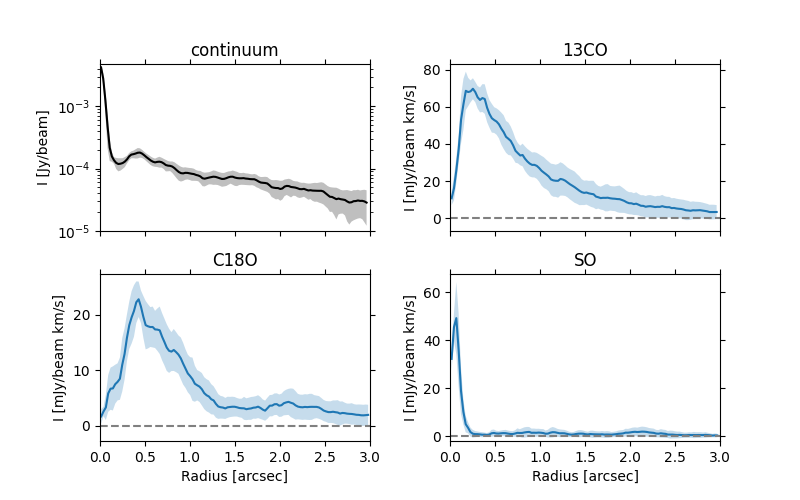

In [26]:
baseline = "SBLB"
# radial profile
molecular_lines = ["13CO", "C18O", "SO"]
fig, axes = plt.subplots(2, 2, figsize=(8, 5), sharey=False, sharex=True)

# continuum
ax = axes.flatten()[0]
profilename = productpath + "{:s}_{:s}_continuum_robust_1.0.profile.wedge{}.txt".format(source, baseline, wedge)
eplot.plot_radial_profile(profilename, ax=ax, color="black")

ax.set(xlim=(0.0, 3.0), ylim=(1e-5, None), title="continuum", ylabel="I [Jy/beam]", yscale="log")
ax.set_aspect(1./ax.get_data_ratio()/sc.golden_ratio, adjustable="box")
ax.axhline(y=0.0, color="gray", ls="dashed")


# lines
for i, line in enumerate(molecular_lines):
    ax = axes.flatten()[i+1]
    profilename = productpath + "{:s}_{:s}_{:s}_robust_0.5.profile.wedge{}.txt".format(source, baseline, line, wedge)

    eplot.plot_radial_profile(profilename, ax=ax)

    ax.set(xlim=(0.0, 3.0), title=line, ylabel="I [mJy/beam km/s]")
    if line != "13CO":
        ax.set(xlabel="Radius [arcsec]")
    ax.set_aspect(1./ax.get_data_ratio()/sc.golden_ratio, adjustable="box")
    ax.axhline(y=0.0, color="gray", ls="dashed")

plt.subplots_adjust(wspace=0.3)



## Comparison between continuum and C18O
- continuum and C18O rings at ~0.5 arcsec really well coincide with each other!
- in the inner most region (<0.2 arcsec), continuum gets stronger and C18O get weaker, matbe due to the absorption against the continuum
- a prominent difference at 1--2 arcsec region; tracing different temperature region? or not that the warped structure appeared around here only in gas disk

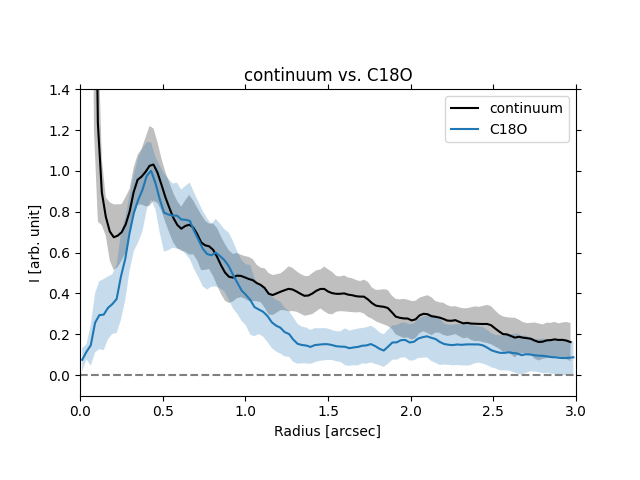

In [27]:
# continuum vs C18O
line = "C18O"
fig, ax = plt.subplots()
contprofilename = productpath + "{:s}_{:s}_continuum_robust_1.0.profile.wedge{}.txt".format(source, baseline, wedge)
C18Oprofilename = productpath + "{:s}_{:s}_{:s}_robust_0.5.profile.wedge{}.txt".format(source, baseline, line, wedge)

eplot.plot_radial_profile(contprofilename, ax=ax, color="black", normalize=True, scale=24, label="continuum")
eplot.plot_radial_profile(C18Oprofilename, ax=ax, normalize=True, label="C18O")

ax.set(xlim=(0.0, 3.0), ylim=(-0.1,1.4), title="continuum vs. C18O", xlabel="Radius [arcsec]", ylabel="I [arb. unit]")
ax.set_aspect(1./ax.get_data_ratio()/sc.golden_ratio, adjustable="box")
ax.axhline(y=0.0, color="gray", ls="dashed")
ax.legend()


## Velocity structure: moment 1 maps of 12CO, 13CO, C18O, SO
- 12CO traces the central component and outflow cavity
- 13CO and C18O mianly traces the disk component, though C18 is less extended
- SO also shows the velocity gradient as well, but faint

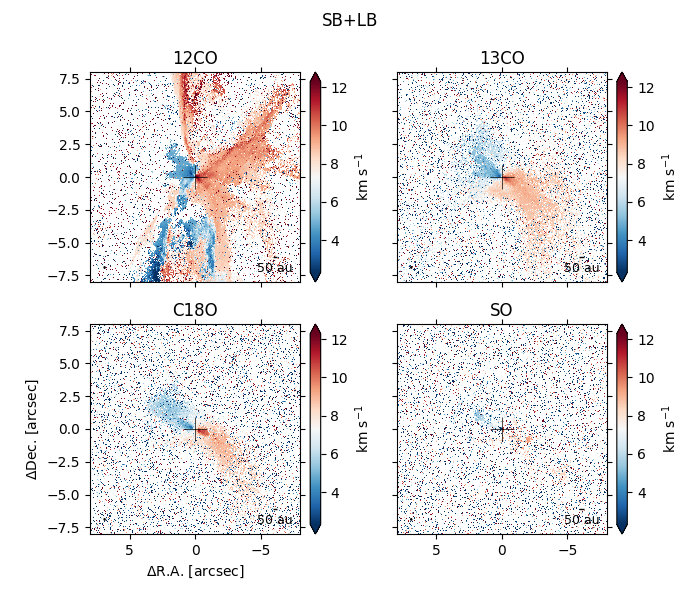

In [2]:
########################## SB+LB #################################
vrange = 5 # in km/s
vsys = source_dict[source]["v_sys"]
molecular_lines = ["12CO", "13CO", "C18O", "SO"]
beam_kw["color"] = "black"

baseline = "SBLB"

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)

for i, line in enumerate(molecular_lines):
    ax = axes.flatten()[i]
    imagename = productpath + "{:s}_{:s}_{:s}_robust_0.5.image_M1.fits".format(
        source, baseline, line, wedge
    )

    eplot.plot_map(
        fitsname=imagename,
        ax=ax,
        center_coord=SkyCoord(source_dict[source]["radec"]),
        data_scaling_factor=1e-3,
        cmap=eplot.cmap[1],
        norm_kwargs=dict(vmin=vsys-vrange, vmax=vsys+vrange),
        beam_kw=beam_kw,
        cbar_kw=dict(label=r"km s$^{-1}$"),
        sbar_kw=dict(color="black")
    )
    ax.set(xlim=(rmax, -rmax), ylim=(-rmax, rmax), title=line)
    ax.scatter(0.0, 0.0, marker="+", color="black", linewidths=0.5, s=300)

axes[1,0].set(xlabel="$\Delta$R.A. [arcsec]", ylabel="$\Delta$Dec. [arcsec]",)
plt.suptitle("SB+LB")
plt.subplots_adjust(wspace=0.3, hspace=0.2)
    

## zoomed 
- SO has a really compact rotating disk! (really?)

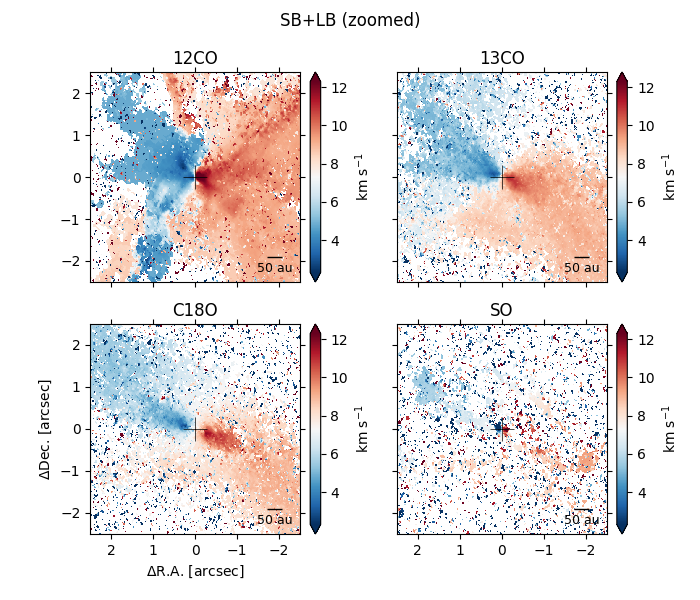

In [3]:
########################## SB+LB #################################
vrange = 5 # in km/s
vsys = source_dict[source]["v_sys"]
molecular_lines = ["12CO", "13CO", "C18O", "SO"]

baseline = "SBLB"

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)

for i, line in enumerate(molecular_lines):
    ax = axes.flatten()[i]
    imagename = productpath + "{:s}_{:s}_{:s}_robust_0.5.image_M1.fits".format(
        source, baseline, line, wedge
    )

    eplot.plot_map(
        fitsname=imagename,
        ax=ax,
        center_coord=SkyCoord(source_dict[source]["radec"]),
        data_scaling_factor=1e-3,
        cmap=eplot.cmap[1],
        norm_kwargs=dict(vmin=vsys-vrange, vmax=vsys+vrange),
        beam_kw=beam_kw,
        cbar_kw=dict(label=r"km s$^{-1}$"),
        sbar_kw=dict(color="black")
    )
    ax.set(xlim=(rmax_zoomed, -rmax_zoomed), ylim=(-rmax_zoomed, rmax_zoomed), title=line)
    ax.scatter(0.0, 0.0, marker="+", color="black", linewidths=0.5, s=300)

axes[1,0].set(xlabel="$\Delta$R.A. [arcsec]", ylabel="$\Delta$Dec. [arcsec]",)
plt.suptitle("SB+LB (zoomed)")
plt.subplots_adjust(wspace=0.3, hspace=0.2)

## SB-only
- basically same as SB+LB

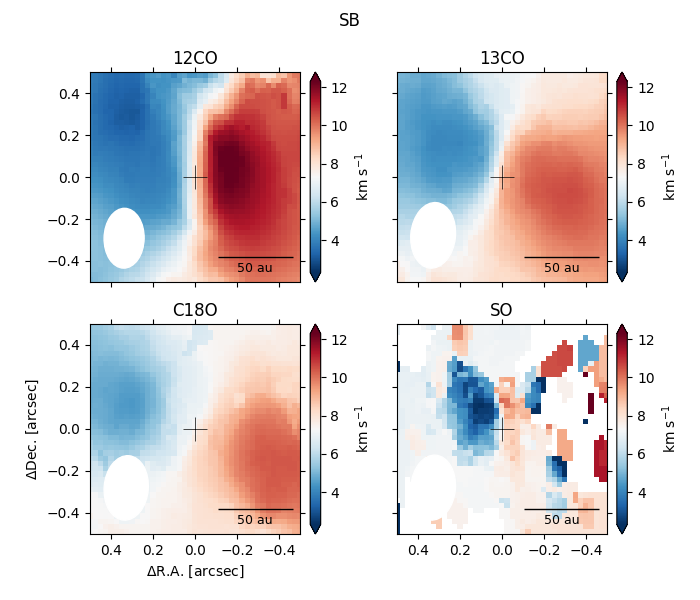

In [4]:
########################## SB-only #################################
vrange = 5 # in km/s
vsys = source_dict[source]["v_sys"]
molecular_lines = ["12CO", "13CO", "C18O", "SO"]

baseline = "SB"

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)

for i, line in enumerate(molecular_lines):
    ax = axes.flatten()[i]
    imagename = productpath + "{:s}_{:s}_{:s}_robust_0.5.image_M1.fits".format(
        source, baseline, line, wedge
    )

    eplot.plot_map(
        fitsname=imagename,
        ax=ax,
        center_coord=SkyCoord(source_dict[source]["radec"]),
        data_scaling_factor=1e-3,
        cmap=eplot.cmap[1],
        norm_kwargs=dict(vmin=vsys-vrange, vmax=vsys+vrange),
        beam_kw=beam_kw,
        cbar_kw=dict(label=r"km s$^{-1}$"),
        sbar_kw=dict(color="black")
    )
    ax.set(xlim=(rmax, -rmax), ylim=(-rmax, rmax), title=line)
    ax.scatter(0.0, 0.0, marker="+", color="black", linewidths=0.5, s=300)

axes[1,0].set(xlabel="$\Delta$R.A. [arcsec]", ylabel="$\Delta$Dec. [arcsec]",)
plt.suptitle("SB")
plt.subplots_adjust(wspace=0.3, hspace=0.2)

## The SO compact disk
- SO shows a hyper compact rotating disk at the center (cnotour: continuum)

NameError: name 'vsys' is not defined

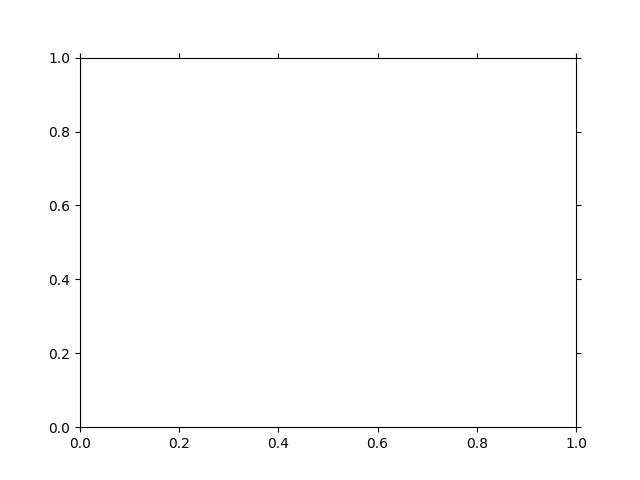

In [2]:
baseline = "SBLB"

line = "SO"
vrange = 7

fig, ax = plt.subplots()

imagename = productpath + "{:s}_{:s}_{:s}_robust_0.5.image_M1.fits".format(
        source, baseline, line, wedge
    )

rmax = 0.5
eplot.plot_map(
        fitsname=imagename,
        ax=ax,
        center_coord=SkyCoord(source_dict[source]["radec"]),
        data_scaling_factor=1e-3,
        cmap=eplot.cmap[1],
        norm_kwargs=dict(vmin=vsys-vrange, vmax=vsys+vrange),
        beam_kw=beam_kw,
        cbar_kw=dict(label=r"km s$^{-1}$"),
        sbar_kw=dict(color="black")
    )
ax.scatter(0.0, 0.0, marker="+", color="black", linewidths=0.5, s=300)
axes[1,0].set(xlabel="$\Delta$R.A. [arcsec]", ylabel="$\Delta$Dec. [arcsec]",)

cont_image = imagepath + "{:s}_{:s}_continuum_robust_1.0.image.tt0.fits".format(
    source, baseline
)

eplot.overlay_contour(fitsname=cont_image, ax=ax, center_coord=SkyCoord(source_dict[source]["radec"]), data_scaling_factor=1e3)
ax.set(xlim=(rmax, -rmax), ylim=(-rmax, rmax), title=line)

[-5.49999998e+00 -5.33299998e+00 -5.16599998e+00 -4.99899998e+00
 -4.83199998e+00 -4.66499998e+00 -4.49799998e+00 -4.33099998e+00
 -4.16399998e+00 -3.99699998e+00 -3.82999998e+00 -3.66299998e+00
 -3.49599998e+00 -3.32899998e+00 -3.16199998e+00 -2.99499998e+00
 -2.82799998e+00 -2.66099998e+00 -2.49399998e+00 -2.32699998e+00
 -2.15999998e+00 -1.99299998e+00 -1.82599998e+00 -1.65899998e+00
 -1.49199998e+00 -1.32499998e+00 -1.15799998e+00 -9.90999981e-01
 -8.23999981e-01 -6.56999981e-01 -4.89999981e-01 -3.22999981e-01
 -1.55999981e-01  1.10000192e-02  1.78000019e-01  3.45000019e-01
  5.12000019e-01  6.79000019e-01  8.46000019e-01  1.01300002e+00
  1.18000002e+00  1.34700002e+00  1.51400002e+00  1.68100002e+00
  1.84800002e+00  2.01500002e+00  2.18200002e+00  2.34900002e+00
  2.51600002e+00  2.68300002e+00  2.85000002e+00  3.01700002e+00
  3.18400002e+00  3.35100002e+00  3.51800002e+00  3.68500002e+00
  3.85200002e+00  4.01900002e+00  4.18600002e+00  4.35300002e+00
  4.52000002e+00  4.68700

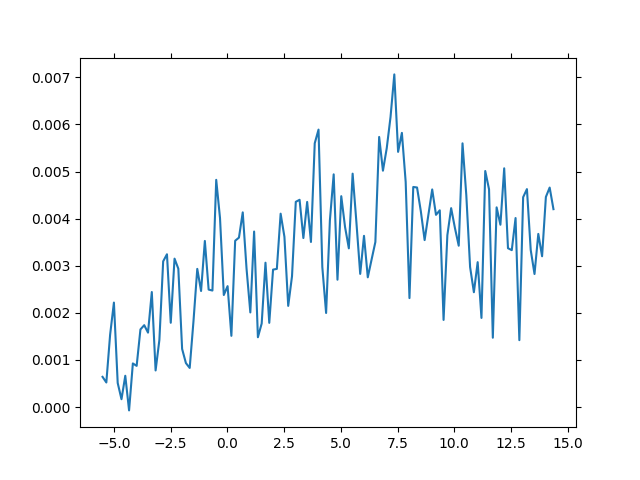

In [17]:
# spectrum
import qdisk.data_product as dp
imagename = imagepath + "{:s}_{:s}_{:s}_robust_0.5.image.fits".format(
        source, baseline, line
    )

v, avgspec = dp.calculate_averaged_spectra(imagename=imagename, rmin=0.0, rmax=0.1)

plt.figure()
plt.plot(v, avgspec)


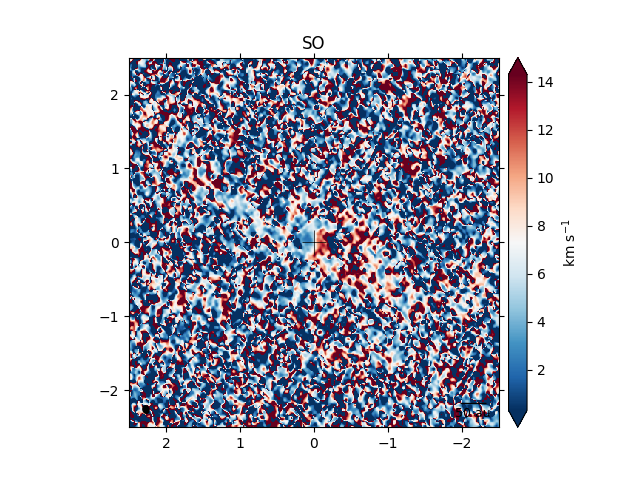

In [25]:
center_coord = SkyCoord(source_dict[source]["radec"])
vrange = 7
vsys = source_dict[source]["v_sys"]
beam_kw.update({"color": "black"})

fig, ax = plt.subplots()

M1name = imagepath + "{:s}_{:s}_{:s}_robust_0.5.image.M1.image.fits".format(
    source, baseline, line
)

eplot.plot_map(
    fitsname=M1name,
    ax=ax,
    center_coord=SkyCoord(source_dict[source]["radec"]),
    data_scaling_factor=1,
    cmap=eplot.cmap[1],
    norm_kwargs=dict(vmin=vsys-vrange, vmax=vsys+vrange),
    beam_kw=beam_kw,
    cbar_kw=dict(label=r"km s$^{-1}$"),
    sbar_kw=dict(color="black")
)

M0name = productpath + "{:s}_{:s}_{:s}_robust_0.5.image_M0.fits".format(
    source, baseline, line
)

# eplot.overlay_contour(fitsname=M0name, ax=ax, center_coord=center_coord)


ax.set(xlim=(rmax_zoomed, -rmax_zoomed), ylim=(-rmax_zoomed, rmax_zoomed), title=line)
ax.scatter(0.0, 0.0, marker="+", color="black", linewidths=0.5, s=300)